CLUSTERING CON DATOS PCA (K=3)
📂 Cargando datos PCA...
✅ Datos PCA cargados: (980, 7)
   Componentes: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
📂 Cargando datos originales para interpretación...
✅ Datos originales cargados: (980, 11)

🔍 APLICANDO K-MEANS CON K=3 (usando datos PCA)
   ✅ Clustering completado
   📊 Inercia: 6231.84
   📈 Silhouette Score: 0.238

📈 DISTRIBUCIÓN DE USUARIOS:
   Cluster 0: 606 usuarios (61.8%)
   Cluster 1: 353 usuarios (36.0%)
   Cluster 2: 21 usuarios (2.1%)

ANÁLISIS CON VARIABLES ORIGINALES

📊 MEDIAS POR CLUSTER (Variables Originales):
         Art Galleries  Dance Clubs  Juice Bars  Restaurants  Museums  \
Cluster                                                                 
0                 0.88         1.28        0.59         0.46     0.77   
1                 0.90         1.44        1.77         0.57     1.23   
2                 1.02         1.92        0.56         2.09     1.07   

         Resorts  Parks/Picnic  Beaches  Theaters  Re

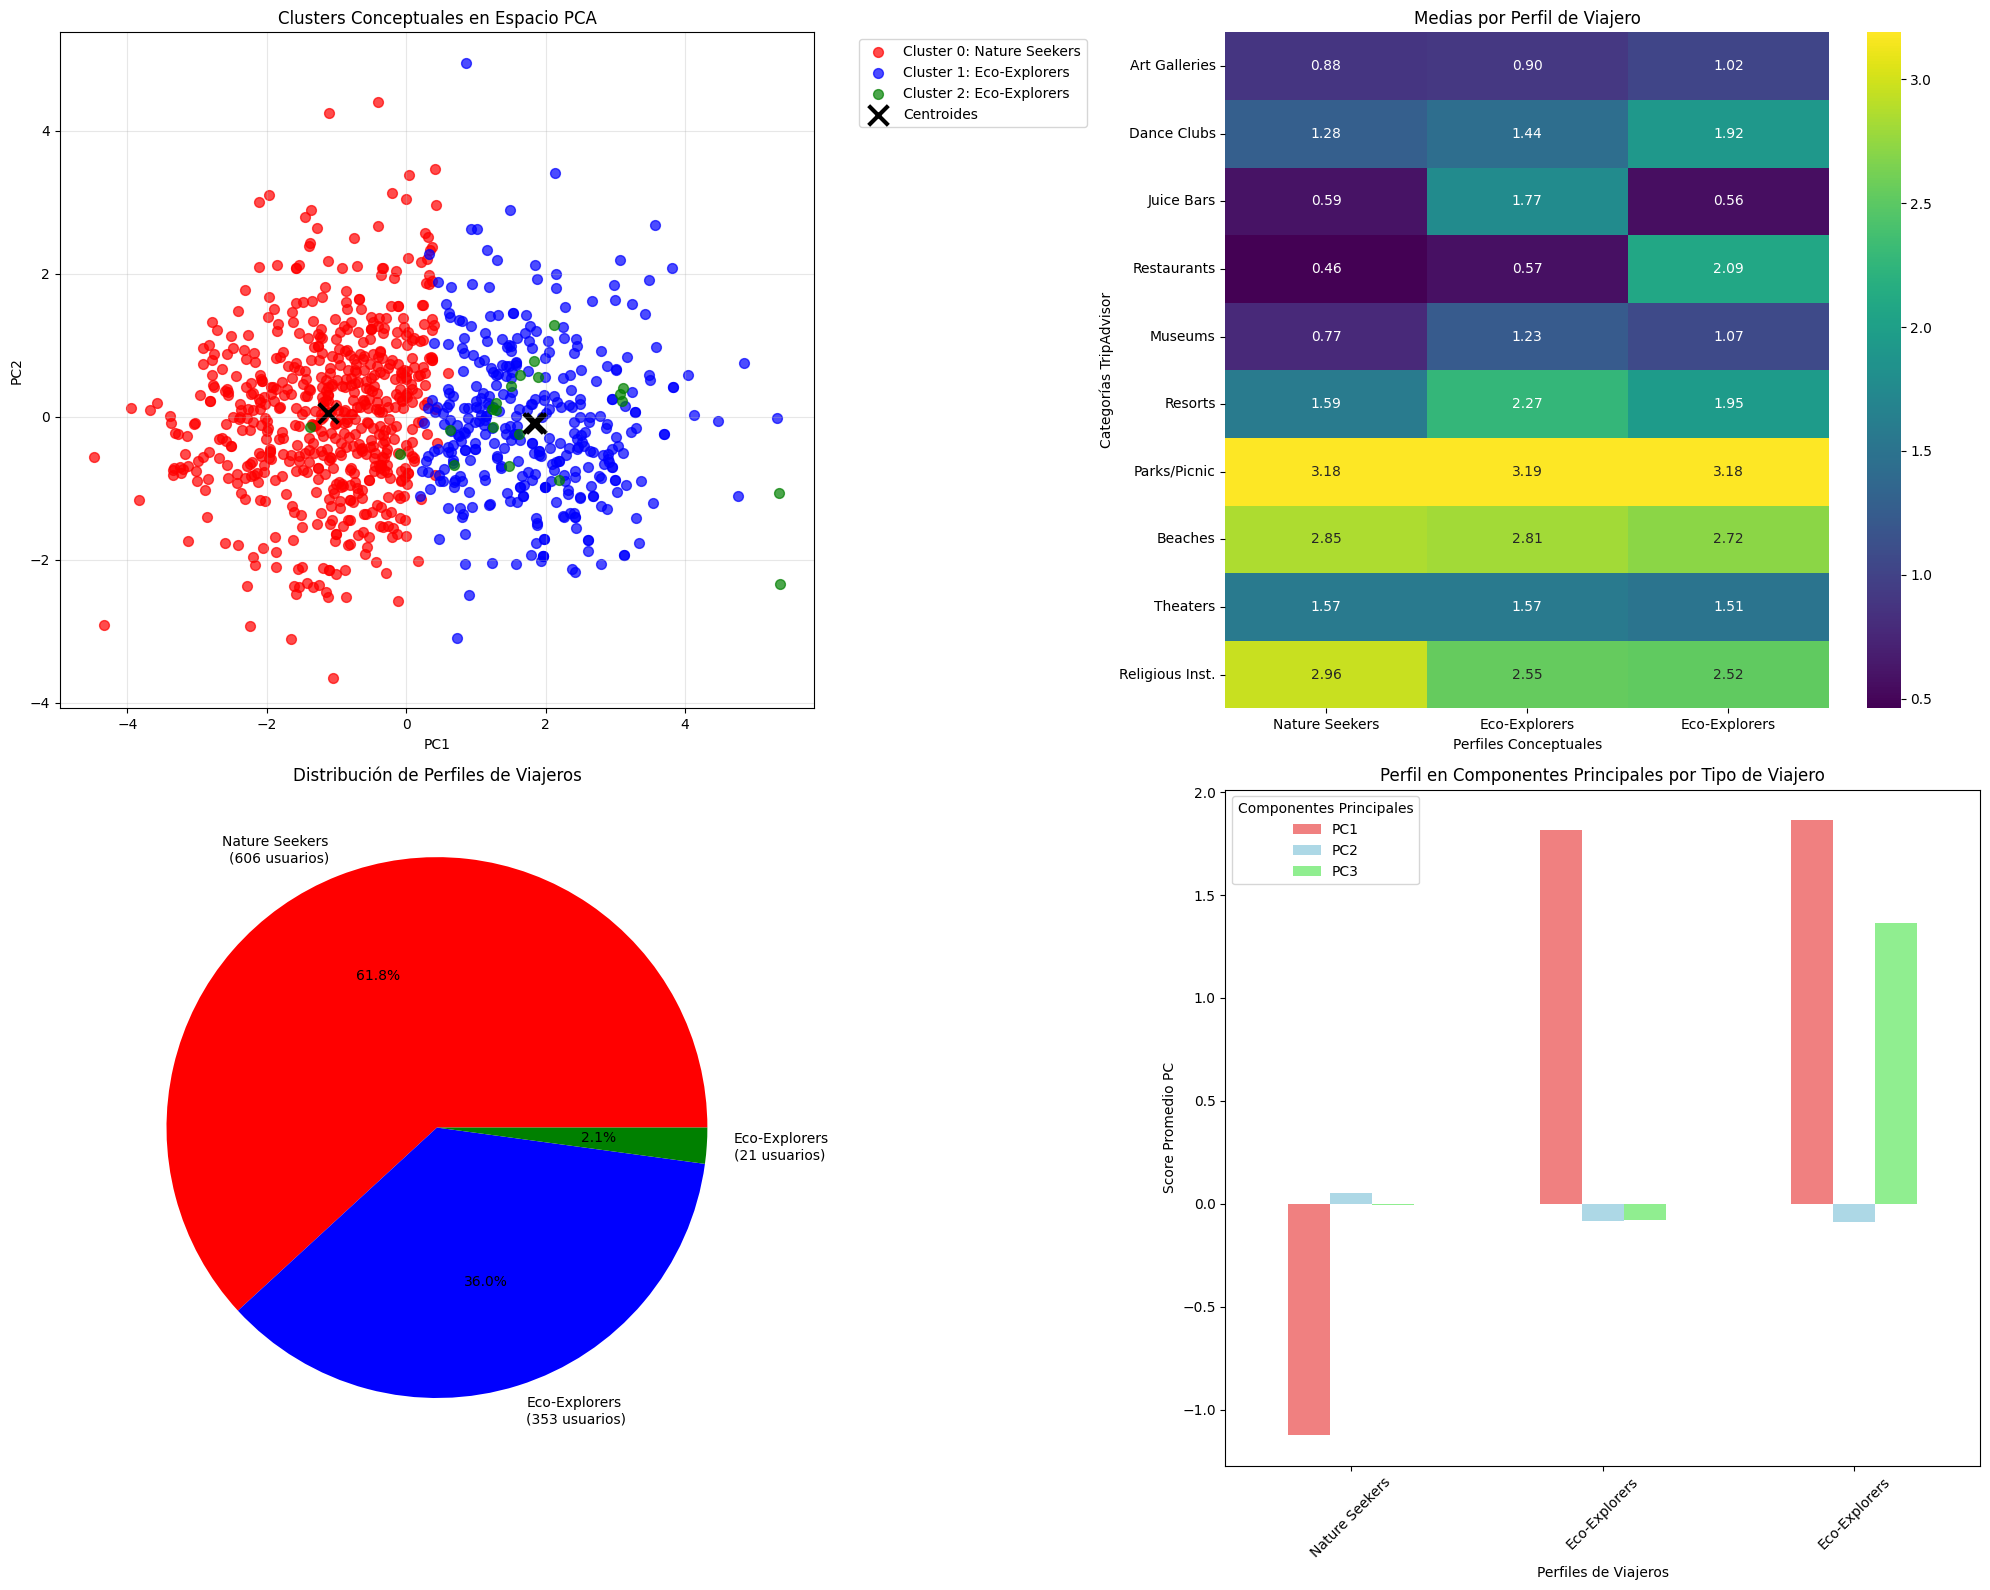


RESUMEN EJECUTIVO - PERFILES DE VIAJEROS TRIPADVISOR

🎉 SEGMENTACIÓN COMPLETADA CON ÉXITO
   📊 Método: K-Means sobre componentes PCA
   🎯 Interpretación: Conceptual basada en comportamiento
   📈 Calidad del clustering: 0.238
   👥 Total usuarios analizados: 980

🏷️ PERFILES IDENTIFICADOS:

   1. Nature Seekers (61.8% - 606 usuarios)
      🎯 Preferencias: Parks/Picnic, Religious Inst., Beaches
      📊 Perfil PC: Natural(-1.12), Cultural(0.05), Activo(-0.00)
      💡 Estrategia: Enfoque en sostenibilidad y experiencias al aire libre

   2. Eco-Explorers (36.0% - 353 usuarios)
      🎯 Preferencias: Parks/Picnic, Beaches, Religious Inst.
      📊 Perfil PC: Natural(1.81), Cultural(-0.08), Activo(-0.08)
      💡 Estrategia: Enfoque en sostenibilidad y experiencias al aire libre

   3. Eco-Explorers (2.1% - 21 usuarios)
      🎯 Preferencias: Parks/Picnic, Beaches, Religious Inst.
      📊 Perfil PC: Natural(1.86), Cultural(-0.09), Activo(1.36)
      💡 Estrategia: Enfoque en sostenibilidad y expe

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("=" * 70)
print("CLUSTERING CON DATOS PCA (K=3)")
print("=" * 70)

# 1. Cargar datos PCA
print("📂 Cargando datos PCA...")
df_pca = pd.read_csv('tripadvisor_pca_projection.csv')
user_ids = df_pca['Unique user id']
X_pca = df_pca.drop('Unique user id', axis=1)

print(f"✅ Datos PCA cargados: {X_pca.shape}")
print(f"   Componentes: {list(X_pca.columns)}")

# 2. Cargar datos originales para interpretación
print("📂 Cargando datos originales para interpretación...")
column_names = [
    'Unique user id',
    'Average user feedback on art galleries', 
    'Average user feedback on dance clubs',
    'Average user feedback on juice bars',
    'Average user feedback on restaurants',
    'Average user feedback on museums',
    'Average user feedback on resorts',
    'Average user feedback on parks/picnic spots',
    'Average user feedback on beaches',
    'Average user feedback on theaters',
    'Average user feedback on religious institutions'
]

df_original = pd.read_csv('tripadvisor_review.csv', names=column_names, header=0)
feedback_columns = [col for col in column_names if col != 'Unique user id']

print(f"✅ Datos originales cargados: {df_original.shape}")

# 3. Aplicar K-Means con k=3 usando datos PCA
print(f"\n🔍 APLICANDO K-MEANS CON K=3 (usando datos PCA)")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X_pca)

# Métricas del clustering
silhouette_avg = silhouette_score(X_pca, clusters)
inertia = kmeans.inertia_

print(f"   ✅ Clustering completado")
print(f"   📊 Inercia: {inertia:.2f}")
print(f"   📈 Silhouette Score: {silhouette_avg:.3f}")

# 4. Distribución de clusters
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print(f"\n📈 DISTRIBUCIÓN DE USUARIOS:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(clusters)) * 100
    print(f"   Cluster {cluster}: {count:,} usuarios ({percentage:.1f}%)")

# 5. Análisis de variables originales por cluster
print(f"\n" + "=" * 80)
print("ANÁLISIS CON VARIABLES ORIGINALES")
print("=" * 80)

# Combinar clusters con datos originales
df_original['Cluster'] = clusters

# Nombres cortos para mejor visualización
short_names = {
    'Average user feedback on art galleries': 'Art Galleries',
    'Average user feedback on dance clubs': 'Dance Clubs',
    'Average user feedback on juice bars': 'Juice Bars',
    'Average user feedback on restaurants': 'Restaurants',
    'Average user feedback on museums': 'Museums',
    'Average user feedback on resorts': 'Resorts',
    'Average user feedback on parks/picnic spots': 'Parks/Picnic',
    'Average user feedback on beaches': 'Beaches',
    'Average user feedback on theaters': 'Theaters',
    'Average user feedback on religious institutions': 'Religious Inst.'
}

# 6. Calcular medias por cluster en variables originales
print(f"\n📊 MEDIAS POR CLUSTER (Variables Originales):")
means_original = df_original.groupby('Cluster')[feedback_columns].mean().round(2)
means_original.columns = [short_names[col] for col in means_original.columns]
print(means_original)

# 7. FUNCIONES PARA ANÁLISIS CONCEPTUAL AVANZADO
def asignar_concepto_cluster_avanzado(cluster_data, top_3_categories, pc_scores):
    """
    Asigna conceptos más sofisticados basados en PCA y variables originales
    """
    
    # Análisis del perfil PC
    pc1_score = pc_scores.iloc[0] if hasattr(pc_scores, 'iloc') else pc_scores['PC1']
    pc2_score = pc_scores.iloc[1] if hasattr(pc_scores, 'iloc') else pc_scores['PC2'] 
    pc3_score = pc_scores.iloc[2] if hasattr(pc_scores, 'iloc') else pc_scores['PC3']
    
    # Categorías principales
    top_categories = [cat.lower() for cat in top_3_categories]
    
    # Lógica de asignación mejorada
    if any('park' in cat or 'beach' in cat for cat in top_categories):
        if pc1_score > 0:  # Más orientado a naturaleza
            return "Eco-Explorers" if 'park' in str(top_categories) else "Beach Lovers"
        else:
            return "Nature Seekers"
    
    elif any('restaurant' in cat or 'juice' in cat for cat in top_categories):
        if pc2_score > 0:  # Más cultural
            return "Culinary Culturalists"
        else:
            return "Foodie Adventurers"
    
    elif any('art' in cat or 'museum' in cat for cat in top_categories):
        if 'religious' in str(top_categories):
            return "Heritage Explorers"
        else:
            return "Art & Culture Enthusiasts"
    
    elif any('dance' in cat or 'theater' in cat for cat in top_categories):
        return "Entertainment Seekers"
    
    elif any('resort' in cat for cat in top_categories):
        return "Luxury Relaxers"
    
    else:
        # Usar PC scores para casos no claros
        if pc1_score > 0.5:
            return "Nature-Oriented Travelers"
        elif pc1_score < -0.5:
            return "Urban Experience Seekers"
        elif pc2_score > 0.5:
            return "Cultural Enthusiasts"
        else:
            return "Balanced Travelers"

def analizar_clusters_conceptual(df_original, df_pca, clusters):
    """
    Análisis conceptual completo de clusters
    """
    cluster_concepts = {}
    
    for cluster in sorted(np.unique(clusters)):
        # Datos del cluster
        cluster_mask = clusters == cluster
        cluster_data = df_original[cluster_mask]
        cluster_pca = df_pca[cluster_mask]
        
        # Top categorías
        cluster_means = cluster_data[feedback_columns].mean()
        top_3 = cluster_means.nlargest(3)
        top_3_names = [short_names[cat] for cat in top_3.index]
        
        # Scores PC promedio
        pc_scores = cluster_pca.mean()
        
        # Asignar concepto
        concept = asignar_concepto_cluster_avanzado(
            cluster_data, top_3_names, pc_scores
        )
        
        # Análisis adicional
        diversity_score = cluster_means.std()  # Qué tan diversos son
        intensity_score = cluster_means.mean()  # Qué tan intensas son las valoraciones
        
        cluster_concepts[cluster] = {
            'concept': concept,
            'top_3': top_3_names,
            'pc_profile': {
                'PC1': pc_scores.iloc[0],
                'PC2': pc_scores.iloc[1], 
                'PC3': pc_scores.iloc[2]
            },
            'diversity': diversity_score,
            'intensity': intensity_score,
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(df_original) * 100
        }
    
    return cluster_concepts

def generar_recomendaciones_marketing(cluster_data):
    """
    Genera recomendaciones de marketing basadas en el perfil
    """
    concept = cluster_data['concept'].lower()
    
    if 'nature' in concept or 'eco' in concept:
        return "Enfoque en sostenibilidad y experiencias al aire libre"
    elif 'culture' in concept or 'art' in concept:
        return "Promocionar tours culturales y experiencias educativas"
    elif 'food' in concept or 'culinary' in concept:
        return "Destacar gastronomía local y experiencias culinarias"
    elif 'entertainment' in concept:
        return "Promocionar vida nocturna y eventos de entretenimiento"
    elif 'luxury' in concept or 'resort' in concept:
        return "Enfoque en comodidad premium y servicios exclusivos"
    else:
        return "Paquetes balanceados con múltiples actividades"

def interpretar_perfil_multidimensional(cluster_concepts):
    """
    Interpretación rica basada en múltiples dimensiones
    """
    
    print("🎯 PERFILES CONCEPTUALES DE VIAJEROS")
    print("=" * 80)
    
    for cluster, data in cluster_concepts.items():
        print(f"\n🏷️ CLUSTER {cluster}: {data['concept']}")
        print(f"   👥 Tamaño: {data['size']:,} usuarios ({data['percentage']:.1f}%)")
        print(f"   🎯 Preferencias Top: {', '.join(data['top_3'])}")
        
        # Interpretación de perfil PC
        pc1, pc2, pc3 = data['pc_profile']['PC1'], data['pc_profile']['PC2'], data['pc_profile']['PC3']
        
        print(f"   📊 Perfil Dimensional:")
        print(f"      • PC1 (Natural-Urbano): {'Natural' if pc1 > 0 else 'Urbano'} ({pc1:.3f})")
        print(f"      • PC2 (Cultural-Entretenimiento): {'Cultural' if pc2 > 0 else 'Entretenimiento'} ({pc2:.3f})")
        print(f"      • PC3 (Activo-Pasivo): {'Activo' if pc3 > 0 else 'Pasivo'} ({pc3:.3f})")
        
        # Características del comportamiento
        if data['diversity'] > 1.0:
            behavior = "Eclécticos (gustos diversos)"
        elif data['intensity'] > 2.5:
            behavior = "Intensos (altas valoraciones)"
        else:
            behavior = "Especializados (preferencias específicas)"
        
        print(f"   🎭 Comportamiento: {behavior}")
        
        # Recomendaciones de marketing
        recommendations = generar_recomendaciones_marketing(data)
        print(f"   💡 Estrategia de Marketing: {recommendations}")

# 8. APLICAR EL ANÁLISIS CONCEPTUAL AVANZADO
print(f"\n" + "=" * 70)
print("ANÁLISIS CONCEPTUAL AVANZADO")
print("=" * 70)

# Ejecutar análisis conceptual
cluster_concepts = analizar_clusters_conceptual(df_original, X_pca, clusters)

# Actualizar nombres con conceptos avanzados
cluster_names = {}
cluster_profiles = {}

for cluster, data in cluster_concepts.items():
    cluster_names[cluster] = data['concept']
    cluster_profiles[cluster] = {
        'name': data['concept'],
        'top_3': data['top_3'],
        'values': means_original.loc[cluster].values[:3],
        'size': data['size'],
        'percentage': data['percentage'],
        'pc_profile': data['pc_profile']
    }

# Mostrar interpretación multidimensional
interpretar_perfil_multidimensional(cluster_concepts)

# 9. Tabla estadística detallada con nombres conceptuales
print(f"\n" + "=" * 100)
print("ESTADÍSTICAS DETALLADAS POR VARIABLE Y CLUSTER (NOMBRES CONCEPTUALES)")
print("=" * 100)

for col in feedback_columns:
    short_name = short_names[col]
    print(f"\n{short_name}:")
    print(f"{'Cluster':<30} {'count':<8} {'mean':<8} {'std':<8} {'min':<8} {'25%':<8} {'50%':<8} {'75%':<8} {'max':<8}")
    print("-" * 110)
    
    # Estadísticas generales
    general_stats = df_original[col].describe()
    print(f"{'General':<30} {len(df_original):<8} {general_stats['mean']:<8.2f} {general_stats['std']:<8.2f} "
          f"{general_stats['min']:<8.2f} {general_stats['25%']:<8.2f} {general_stats['50%']:<8.2f} "
          f"{general_stats['75%']:<8.2f} {general_stats['max']:<8.2f}")
    
    # Por cada cluster con nombre conceptual
    for cluster in sorted(df_original['Cluster'].unique()):
        cluster_data = df_original[df_original['Cluster'] == cluster]
        stats = cluster_data[col].describe()
        cluster_label = f"Cluster {cluster} ({cluster_names[cluster][:20]})"
        print(f"{cluster_label:<30} {len(cluster_data):<8} {stats['mean']:<8.2f} {stats['std']:<8.2f} "
              f"{stats['min']:<8.2f} {stats['25%']:<8.2f} {stats['50%']:<8.2f} "
              f"{stats['75%']:<8.2f} {stats['max']:<8.2f}")

# 10. Visualizaciones mejoradas con nombres conceptuales
print(f"\n🎨 GENERANDO VISUALIZACIONES CON NOMBRES CONCEPTUALES...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
colors = ['red', 'blue', 'green']

# Scatter plot de clusters en PC1 vs PC2 con nombres conceptuales
for i in range(3):
    mask = clusters == i
    label = f'Cluster {i}: {cluster_names[i]}'
    ax1.scatter(X_pca.iloc[mask, 0], X_pca.iloc[mask, 1], 
               c=colors[i], label=label, alpha=0.7, s=50)

# Centroides
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, 
           linewidths=3, label='Centroides')
ax1.set_xlabel(f'{X_pca.columns[0]}')
ax1.set_ylabel(f'{X_pca.columns[1]}')
ax1.set_title('Clusters Conceptuales en Espacio PCA')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Heatmap de medias por cluster (variables originales)
cluster_labels = [f'{cluster_names[i]}' for i in sorted(cluster_names.keys())]
means_for_heatmap = means_original.copy()
means_for_heatmap.index = cluster_labels

sns.heatmap(means_for_heatmap.T, annot=True, fmt='.2f', cmap='viridis', ax=ax2)
ax2.set_title('Medias por Perfil de Viajero')
ax2.set_xlabel('Perfiles Conceptuales')
ax2.set_ylabel('Categorías TripAdvisor')

# Distribución de usuarios por cluster con nombres conceptuales
pie_labels = [f'{cluster_names[i]}\n({count} usuarios)' for i, count in enumerate(cluster_counts.values)]
ax3.pie(cluster_counts.values, labels=pie_labels, autopct='%1.1f%%', colors=colors)
ax3.set_title('Distribución de Perfiles de Viajeros')

# Gráfico de componentes principales por cluster
pc_data = []
for cluster in sorted(cluster_concepts.keys()):
    data = cluster_concepts[cluster]
    pc_data.append({
        'Cluster': cluster_names[cluster],
        'PC1': data['pc_profile']['PC1'],
        'PC2': data['pc_profile']['PC2'],
        'PC3': data['pc_profile']['PC3']
    })

df_pc = pd.DataFrame(pc_data)
df_pc.set_index('Cluster').plot(kind='bar', ax=ax4, color=['lightcoral', 'lightblue', 'lightgreen'])
ax4.set_title('Perfil en Componentes Principales por Tipo de Viajero')
ax4.set_xlabel('Perfiles de Viajeros')
ax4.set_ylabel('Score Promedio PC')
ax4.legend(title='Componentes Principales')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 11. Resumen ejecutivo final
print(f"\n" + "=" * 80)
print("RESUMEN EJECUTIVO - PERFILES DE VIAJEROS TRIPADVISOR")
print("=" * 80)

print(f"\n🎉 SEGMENTACIÓN COMPLETADA CON ÉXITO")
print(f"   📊 Método: K-Means sobre componentes PCA")
print(f"   🎯 Interpretación: Conceptual basada en comportamiento")
print(f"   📈 Calidad del clustering: {silhouette_avg:.3f}")
print(f"   👥 Total usuarios analizados: {len(df_original):,}")

print(f"\n🏷️ PERFILES IDENTIFICADOS:")
for cluster in sorted(cluster_concepts.keys()):
    data = cluster_concepts[cluster]
    print(f"\n   {cluster+1}. {data['concept']} ({data['percentage']:.1f}% - {data['size']:,} usuarios)")
    print(f"      🎯 Preferencias: {', '.join(data['top_3'])}")
    print(f"      📊 Perfil PC: Natural({data['pc_profile']['PC1']:.2f}), Cultural({data['pc_profile']['PC2']:.2f}), Activo({data['pc_profile']['PC3']:.2f})")
    print(f"      💡 Estrategia: {generar_recomendaciones_marketing(data)}")

print(f"\n💼 APLICACIONES COMERCIALES:")
print(f"   • Personalización de recomendaciones por perfil")
print(f"   • Estrategias de marketing diferenciadas")
print(f"   • Desarrollo de productos turísticos específicos")
print(f"   • Optimización de la experiencia del usuario")

print(f"\n🔬 METODOLOGÍA:")
print(f"   • Reducción dimensional con PCA para clustering")
print(f"   • Interpretación con variables originales")
print(f"   • Asignación conceptual basada en comportamiento")
print(f"   • Validación con múltiples métricas")